# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

##### My hypotheses:
1. Stores containing brands of reasonably priced products will have higher sales.
2. Space between the aisles soar the sales as many people tend to shop in stores which are spacious.
3. Stores with support staff in different sections may impact sales as people tend to find things easily with their help.
4. Fresh produce of fruits, veggies, etc. make the store a popular choics for daily grocery.
5. Products availability in different sizes (esp. small) urges more people to buy the products to try them.


----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')

In [3]:
data.shape

(8523, 12)

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do the min & max values make sense?

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Item visibility of 0% does not make sense, it implies that the item is availbale but its visibility percentage is maybe not recorded (or the item is not displayed).
- Minimum of 33.29 for Item_Outlet_Sales seem too low, it is like the product is sold only once in a particular store (or its total units sold are not recorded).

**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [7]:
data['Item_Identifier'].nunique()

1559

In [8]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
data['Outlet_Identifier'].nunique()

10

In [11]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [13]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

**Task:** How many products are there, how many stores, item types?


There are 1559 products from 16 types across 10 different stores.

**Task:** Explore the numbers of each categorical variable.

In [14]:
data['Item_Identifier'].value_counts().head(6)

FDW13    10
FDG33    10
NCF42     9
FDX20     9
NCL31     9
NCJ30     9
Name: Item_Identifier, dtype: int64

In [15]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [18]:
data['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

The LF and low fat values of Item_Type need to be converted to Low Fat and reg to Regular.

Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

*Item_Weight* and *Outlet_Size* have missing values. 
- Outlet_Size can be imputed using the mode of value corresponding to its outlet_type. 
- Item_Weight can be imputed using mean/median values per Item_Type.

In [21]:
data['item_weight_missing']=0 # new variable to record locations where data was initially missing
data.loc[data['Item_Weight'].isnull(),'item_weight_missing'] = 1

In [22]:
data["Item_Weight_Mean"] = data[['Item_Type','Item_Weight']].groupby("Item_Type").transform(lambda x: x.fillna(x.mean()))

In [23]:
data["Item_Weight_Median"] = data[['Item_Type','Item_Weight']].groupby("Item_Type").transform(lambda x: x.fillna(x.median()))

In [24]:
data[['Item_Type',"Item_Weight_Mean"]][data['item_weight_missing']==1].head(10)

,Item_Type,Item_Weight_Mean
7,Snack Foods,12.987880
18,Hard Drinks,11.400328
21,Baking Goods,12.277108
23,Baking Goods,12.277108
29,Canned,12.305705
36,Fruits and Vegetables,13.224769
38,Snack Foods,12.987880
39,Snack Foods,12.987880
49,Dairy,13.426069
59,Canned,12.305705


In [25]:
data[['Item_Type',"Item_Weight_Median"]][data['item_weight_missing']==1].head(10)

,Item_Type,Item_Weight_Median
7,Snack Foods,13.15
18,Hard Drinks,10.10
21,Baking Goods,11.65
23,Baking Goods,11.65
29,Canned,12.15
36,Fruits and Vegetables,13.10
38,Snack Foods,13.15
39,Snack Foods,13.15
49,Dairy,13.35
59,Canned,12.15


No considerable difference between imputing values by mean and median. Median values look neater

In [26]:
data['outlet_size_missing']=0
data.loc[data['Outlet_Size'].isnull(),'outlet_size_missing'] = 1

In [38]:
data[['Outlet_Type','Outlet_Size','Outlet_Location_Type']].groupby(['Outlet_Type','Outlet_Size']).count()

Outlet_Location_Type
Outlet_Type       Outlet_Size                      
Grocery Store     Small                         528
Supermarket Type1 High                          932
                  Medium                        930
                  Small                        1860
Supermarket Type2 Medium                        928
Supermarket Type3 Medium                        935

In [39]:
#data["Outlet_Size1"] = data[['Outlet_Type','Outlet_Size']].groupby("Outlet_Type").transform(lambda x: x.fillna(x.mode().iloc[0]))

data['Outlet_Size1']=data[['Outlet_Type','Outlet_Size']].groupby('Outlet_Type').transform(lambda x: x.fillna(x.mode()[0]))

In [43]:
data[['Outlet_Type',"Outlet_Size1"]][(data['outlet_size_missing']==1) & (data['Outlet_Type']=='Supermarket Type1')]

,Outlet_Type,Outlet_Size1
8,Supermarket Type1,Small
9,Supermarket Type1,Small
25,Supermarket Type1,Small
33,Supermarket Type1,Small
46,Supermarket Type1,Small
...,...,...
8501,Supermarket Type1,Small
8502,Supermarket Type1,Small
8508,Supermarket Type1,Small
8514,Supermarket Type1,Small


In [44]:
data['Outlet_Size1'].value_counts(dropna=False)

Small     4798
Medium    2793
High       932
Name: Outlet_Size1, dtype: int64

**Task:** Check if there are no more missing values.

In [45]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
item_weight_missing             0
Item_Weight_Mean                0
Item_Weight_Median              0
outlet_size_missing             0
Outlet_Size1                    0
dtype: int64

In [47]:
data.drop(columns=['Item_Weight','Item_Weight_Mean','Outlet_Size'],inplace=True)

In [49]:
data.rename({'Item_Weight_Median': 'Item_Weight', 'Outlet_Size1': 'Outlet_Size'}, axis=1,inplace=True)

In [50]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'item_weight_missing', 'Item_Weight', 'outlet_size_missing',
       'Outlet_Size'],
      dtype='object')

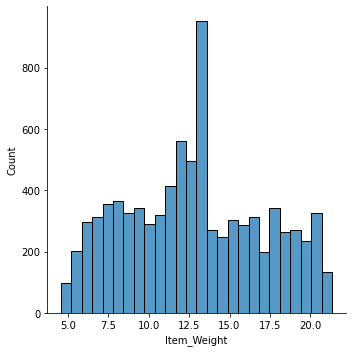

In [51]:
sns.displot(data, x="Item_Weight")

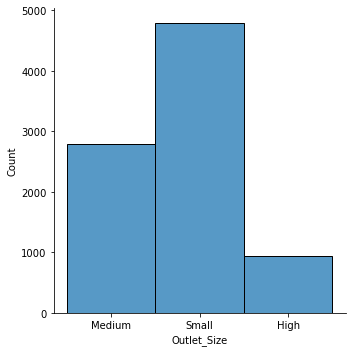

In [52]:
sns.displot(data, x="Outlet_Size")

## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





### Create a broad category of Type of Item

`Item_Type` variable has many categories which might prove to be very useful in analysis. Look at the `Item_Identifier`, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. 

**Task:** Use the Item_Identifier variable to create a new column

In [53]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCF42     9
FDX20     9
NCL31     9
         ..
FDN52     1
FDE52     1
DRF48     1
FDO33     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [55]:
data['Item_Identify_Type']=data['Item_Identifier'].str[:2]

In [56]:
data['Item_Identify_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identify_Type, dtype: int64

### Determine the years of operation of a store

**Task:** Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [67]:
data['Outlet_Op_Years']=pd.to_datetime(data['Outlet_Establishment_Year'])

In [68]:
today = datetime.date.today()

In [70]:
data['Outlet_Op_Years']= pd.to_datetime(today) - data['Outlet_Op_Years']

In [71]:
data['Outlet_Op_Years']=data['Outlet_Op_Years']/np.timedelta64(1,'Y')

### Modify categories of Item_Fat_Content

**Task:** There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

In [73]:
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [75]:
data.Item_Fat_Content.replace('LF','Low Fat',inplace=True)
data.Item_Fat_Content.replace('low fat','Low Fat',inplace=True)
data.Item_Fat_Content.replace('reg','Regular',inplace=True)


In [76]:
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Task:** There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [80]:
data['misleading'] = 0
data['misleading'][(data.Item_Identify_Type == 'NC')] = 1

C:\Users\User\AppData\Local\Temp/ipykernel_12780/2219568676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['misleading'][(data.Item_Identify_Type == 'NC')] = 1


In [81]:
data['misleading'].value_counts()

0    6924
1    1599
Name: misleading, dtype: int64

### Numerical and One-Hot Encoding of Categorical variables

Since scikit-learn algorithms accept only numerical variables, we need to **convert all categorical variables into numeric types.** 

- if the variable is Ordinal we can simply map its values into numbers
- if the variable is Nominal (we cannot sort the values) we need to One-Hot Encode them --> create dummy variables

In [79]:
data.dtypes[data.dtypes == 'object']

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Location_Type    object
Outlet_Type             object
Outlet_Size             object
Item_Identify_Type      object
dtype: object

In [82]:
data=data.replace({'Outlet_Size':{'Small':1,'Medium':2,'High':3},
                  'Outlet_Location_Type':{'Tier 1': 1,'Tier 2': 2, 'Tier 3': 3},
                  'Outlet_Type':{'Grocery Store': 0, 'Supermarket Type1': 1,'Supermarket Type2': 2,'Supermarket Type3': 3}})

In [87]:
data.drop('Item_Identifier',axis=1,inplace=True)

In [88]:
cat_feats = data.dtypes[data.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(data[cat_feats])

In [89]:
df_dummy.shape

(8523, 31)

In [92]:
df_dummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identify_Type_DR,Item_Identify_Type_FD,Item_Identify_Type_NC
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
df_dummy.dtypes

Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Regular           uint8
Item_Type_Baking Goods             uint8
Item_Type_Breads                   uint8
Item_Type_Breakfast                uint8
Item_Type_Canned                   uint8
Item_Type_Dairy                    uint8
Item_Type_Frozen Foods             uint8
Item_Type_Fruits and Vegetables    uint8
Item_Type_Hard Drinks              uint8
Item_Type_Health and Hygiene       uint8
Item_Type_Household                uint8
Item_Type_Meat                     uint8
Item_Type_Others                   uint8
Item_Type_Seafood                  uint8
Item_Type_Snack Foods              uint8
Item_Type_Soft Drinks              uint8
Item_Type_Starchy Foods            uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifie

In [103]:
data_feature_engg= data.join(df_dummy)


In [104]:
data_feature_engg.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_missing,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identify_Type_DR,Item_Identify_Type_FD,Item_Identify_Type_NC
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,1,3735.1380,0,...,0,0,0,0,0,0,1,0,1,0
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,3,2,443.4228,0,...,1,0,0,0,0,0,0,1,0,0
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,1,2097.2700,0,...,0,0,0,0,0,0,1,0,1,0
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,0,732.3800,0,...,0,0,0,0,0,0,0,0,1,0
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,3,1,994.7052,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
data_feature_engg.shape

(8523, 47)

In [106]:
data_feature_engg.dtypes

Item_Fat_Content                    object
Item_Visibility                    float64
Item_Type                           object
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Outlet_Location_Type                 int64
Outlet_Type                          int64
Item_Outlet_Sales                  float64
item_weight_missing                  int64
Item_Weight                        float64
outlet_size_missing                  int64
Outlet_Size                          int64
Item_Identify_Type                  object
Outlet_Op_Years                    float64
misleading                           int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_F

In [110]:
cat_feats = data_feature_engg.dtypes[data_feature_engg.dtypes == 'object'].index.tolist()
data_feature_engg.drop(cat_feats,axis=1,inplace=True)

In [111]:
data_feature_engg.shape

(8523, 43)

**All variables should be by now numeric.**

---------
### Exporting Data

**Task:** You can save the processed data to your local machine as a csv file.

In [113]:
data_feature_engg.to_csv('data_feature_engg.csv',index=False)